In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
19,800,1,32.0
15,1175,2,42.0
7,3300,4,155.0
10,1800,3,82.0
11,2785,4,140.0


In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [4]:
scaled_X = sx.fit_transform(df.drop('price',axis='columns'))

In [5]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [6]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [8]:
np.ones(shape=(2))

array([1., 1.])

In [9]:
np.random.permutation(20)

array([18,  6, 13, 16, 17, 10, 14,  0,  4,  5,  2,  3, 12,  9, 19, 15,  8,
       11,  7,  1])

In [10]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.70990085, 0.67806557]), -0.233270324587699, 0.0034527979784009745)

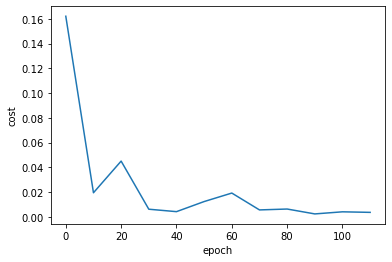

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [13]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.64744069642128

In [14]:
predict(1056,2,w,b)

31.8532789630599

In [15]:
predict(1500,3,w,b)

69.41090817926714

In [76]:
X= scaled_X
y_true = scaled_y.reshape(scaled_y.shape[0],)
batch_size = 5

print('Print X')
print(X) 
print('\n') 
random_indices = np.random.permutation(20)

print('random_indices')
print(random_indices) 

print('\n') 

X_tmp = X[random_indices]
print('X_tmp') 

print(X_tmp)
print('\n') 
y_tmp = y_true[random_indices]

for j in range(0,20,5):
    print('j')
    print(j)
    print('j+batch_size')
    print(j+batch_size)
    Xj = X_tmp[j:j+batch_size]
    yj = y_tmp[j:j+batch_size]

    print('Xj')
    print(Xj)
      
 
    
     

   

Print X
[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]


random_indices
[ 2 12  9 18  4  6  1 15 13 16  5 10 17 14  8  3 19  7 11  0]


X_tmp
[[0.22068966 0.5       ]
 [0.06896552 0.25      ]
 [1.         1.        ]
 [0.67931034 0.5       ]
 [0.13793103 0.25      ]
 [0.6662069  0.75      ]
 [0.62068966 0.75      ]
 [0.12931034 0.25      ]
 [0.10344828 0.25      ]
 [0.13103448 0.5       ]
 [0.12758621 0.25      ]
 [0.34482759 0.5       ]
 [0.25517241 0.5       ]
 [0.5        0.5       ]
 [0.17586207 0.5       ]
 [0.24862069 0.5       ]
 [0.